In [1]:
import tensorflow as tf

2025-03-26 19:39:55.151751: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-26 19:39:55.151916: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-26 19:39:55.366578: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-26 19:39:55.735084: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
    else:
        print("Failed to detect a GPU.")

Found a GPU with the name: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Failed to detect a GPU.


2025-03-26 19:40:43.247225: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-26 19:40:43.487875: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-03-26 19:40:43.487963: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [7]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.4 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 6.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 10.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 8.7 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Step 1

In [9]:
os.listdir()

['.ipynb_checkpoints',
 '20250213 playground',
 '20250221AirPassengers.ipynb',
 'ann_disneydummy.ipynb',
 'assignment.pdf',
 'code',
 'data',
 'documentatie',
 'nihal watsap',
 'Nihal_Disney_Waiting_Times.ipynb',
 'notebooks',
 'Peter_exploring_just_for_fun.ipynb']

In [10]:
path = 'data/waiting times'   # todo : check hoe je vanuit ander file vertrekt: ok ../../rest_path

In [11]:
print(os.listdir(path))
len(os.listdir(path))  # er zijn 52 attracties

['7_dwarfs_train.csv', 'alien_saucers.csv', 'ariel_s_grotto.csv', 'astro_orbiter.csv', 'barnstormer.csv', 'big_thunder_mtn.csv', 'buzz_lightyear.csv', 'carousel_of_progress.csv', 'casey_jr_splash.csv', 'country_bears.csv', 'dinosaur.csv', 'dumbo.csv', 'enchanted_tiki_rm.csv', 'ench_tales_w__belle.csv', 'expedition_everest.csv', 'flight_of_passage.csv', 'hall_of_presidents.csv', 'haunted_mansion.csv', 'it_s_a_small_world.csv', 'jungle_cruise.csv', 'kilimanjaro_safaris.csv', 'laugh_floor.csv', 'liberty_sq_riverboat.csv', 'mad_tea_party.csv', 'magic_carpets.csv', 'main_st_vehicles.csv', 'navi_river.csv', 'peoplemover.csv', 'peter_pan_s_flight.csv', 'pete_s__goofy_donald.csv', 'pete_s__minnie_daisy.csv', 'philharmagic.csv', 'pirates_of_caribbean.csv', 'pirate_s_adventure.csv', 'princess_hall__cinderella_elena.csv', 'princess_hall__rapunzel_tiana.csv', 'regal_carrousel.csv', 'rock_n_rollercoaster.csv', 'slinky_dog.csv', 'soarin.csv', 'sorcerers_of_the_mk.csv', 'spaceship_earth.csv', 'space_

52

In [12]:
list_df=[]
for file in os.listdir(path):
    path_file= os.path.join(path, file)
    df = pd.read_csv(path_file)  # FileNotFoundError: [Errno 2] No such file or directory: '7_dwarfs_train.csv', moet path.join bij ok
    if df.empty:
        continue                # vroeger 10306140 rijen , nu 10306140 rows ???
    df['attraction']=file.replace('.csv', '')
    list_df.append(df)
    # break
# list_df

In [13]:
df_overall = pd.concat(list_df, ignore_index=True)
df_overall  # 10_306_140 rows × 5 columns

,date,datetime,SACTMIN,SPOSTMIN,attraction
0,01/01/2015,2015-01-01 07:51:12,NaN,45.0,7_dwarfs_train
1,01/01/2015,2015-01-01 08:02:13,NaN,60.0,7_dwarfs_train
2,01/01/2015,2015-01-01 08:05:30,54.0,NaN,7_dwarfs_train
3,01/01/2015,2015-01-01 08:09:12,NaN,60.0,7_dwarfs_train
4,01/01/2015,2015-01-01 08:16:12,NaN,60.0,7_dwarfs_train
...,...,...,...,...,...
10306135,12/28/2021,2021-12-28 22:34:35,NaN,5.0,winnie_the_pooh
10306136,12/28/2021,2021-12-28 22:42:15,NaN,5.0,winnie_the_pooh
10306137,12/28/2021,2021-12-28 22:48:12,NaN,5.0,winnie_the_pooh
10306138,12/28/2021,2021-12-28 22:54:10,NaN,5.0,winnie_the_pooh


In [14]:
df_waiting = df_overall.copy()

In [15]:
df_waiting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10306140 entries, 0 to 10306139
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   date        object 
 1   datetime    object 
 2   SACTMIN     float64
 3   SPOSTMIN    float64
 4   attraction  object 
dtypes: float64(2), object(3)
memory usage: 393.1+ MB


In [17]:
df_waiting.describe().round(2)

,SACTMIN,SPOSTMIN
count,192389.00,10113751.00
mean,24.85,-99.63
std,1251.81,349.39
min,-92918.00,-999.00
25%,8.00,10.00
50%,17.00,20.00
75%,29.00,45.00
max,508261.00,390.00


<Axes: >

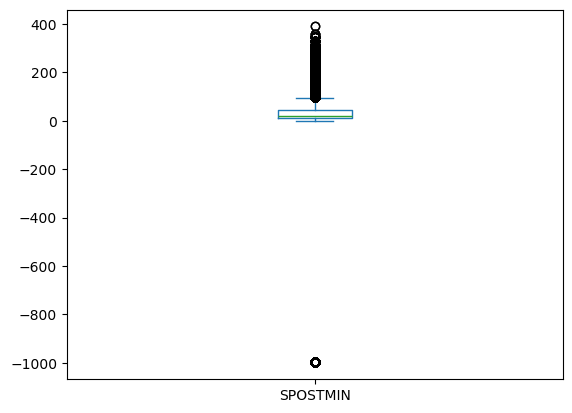

In [8]:
df_waiting['SPOSTMIN'].plot(kind='box')

In [7]:
outliers = df_waiting[ df_waiting['SPOSTMIN']<-998.5 ]  # -999 betekent attractie gesloten
outliers   # 1318686 row outliers  +  8795065 = origineel

,date,datetime,SACTMIN,SPOSTMIN,attraction
107,01/01/2015,2015-01-01 20:26:24,NaN,-999.0,7_dwarfs_train
108,01/01/2015,2015-01-01 20:58:01,NaN,-999.0,7_dwarfs_train
109,01/01/2015,2015-01-01 20:58:26,NaN,-999.0,7_dwarfs_train
279,01/02/2015,2015-01-02 23:50:15,NaN,-999.0,7_dwarfs_train
374,01/03/2015,2015-01-03 19:02:32,NaN,-999.0,7_dwarfs_train
...,...,...,...,...,...
10306121,12/28/2021,2021-12-28 21:10:37,NaN,-999.0,winnie_the_pooh
10306122,12/28/2021,2021-12-28 21:15:37,NaN,-999.0,winnie_the_pooh
10306123,12/28/2021,2021-12-28 21:24:09,NaN,-999.0,winnie_the_pooh
10306124,12/28/2021,2021-12-28 21:30:15,NaN,-999.0,winnie_the_pooh


In [8]:
df_waiting = df_waiting[ df_waiting['SPOSTMIN']>-998.5 ]
df_waiting

,date,datetime,SACTMIN,SPOSTMIN,attraction
0,01/01/2015,2015-01-01 07:51:12,NaN,45.0,7_dwarfs_train
1,01/01/2015,2015-01-01 08:02:13,NaN,60.0,7_dwarfs_train
3,01/01/2015,2015-01-01 08:09:12,NaN,60.0,7_dwarfs_train
4,01/01/2015,2015-01-01 08:16:12,NaN,60.0,7_dwarfs_train
6,01/01/2015,2015-01-01 08:23:12,NaN,60.0,7_dwarfs_train
...,...,...,...,...,...
10306135,12/28/2021,2021-12-28 22:34:35,NaN,5.0,winnie_the_pooh
10306136,12/28/2021,2021-12-28 22:42:15,NaN,5.0,winnie_the_pooh
10306137,12/28/2021,2021-12-28 22:48:12,NaN,5.0,winnie_the_pooh
10306138,12/28/2021,2021-12-28 22:54:10,NaN,5.0,winnie_the_pooh


In [9]:
df_waiting['date'] = pd.to_datetime(df_waiting['date'], errors='coerce')
df_waiting['datetime'] = pd.to_datetime(df_waiting['datetime'], errors='coerce')
df_waiting

,date,datetime,SACTMIN,SPOSTMIN,attraction
0,2015-01-01,2015-01-01 07:51:12,NaN,45.0,7_dwarfs_train
1,2015-01-01,2015-01-01 08:02:13,NaN,60.0,7_dwarfs_train
3,2015-01-01,2015-01-01 08:09:12,NaN,60.0,7_dwarfs_train
4,2015-01-01,2015-01-01 08:16:12,NaN,60.0,7_dwarfs_train
6,2015-01-01,2015-01-01 08:23:12,NaN,60.0,7_dwarfs_train
...,...,...,...,...,...
10306135,2021-12-28,2021-12-28 22:34:35,NaN,5.0,winnie_the_pooh
10306136,2021-12-28,2021-12-28 22:42:15,NaN,5.0,winnie_the_pooh
10306137,2021-12-28,2021-12-28 22:48:12,NaN,5.0,winnie_the_pooh
10306138,2021-12-28,2021-12-28 22:54:10,NaN,5.0,winnie_the_pooh


In [13]:
# df_wait_post = df_wait[~df_wait.SPOSTMIN.isnull()].drop('SACTMIN', axis = 1)  # tim
df_waitingNA = df_waiting[ ~df_waiting.SPOSTMIN.isnull() ]
df_waitingNA

,date,datetime,SACTMIN,SPOSTMIN,attraction
0,01/01/2015,2015-01-01 07:51:12,NaN,45.0,7_dwarfs_train
1,01/01/2015,2015-01-01 08:02:13,NaN,60.0,7_dwarfs_train
3,01/01/2015,2015-01-01 08:09:12,NaN,60.0,7_dwarfs_train
4,01/01/2015,2015-01-01 08:16:12,NaN,60.0,7_dwarfs_train
6,01/01/2015,2015-01-01 08:23:12,NaN,60.0,7_dwarfs_train
...,...,...,...,...,...
10306135,12/28/2021,2021-12-28 22:34:35,NaN,5.0,winnie_the_pooh
10306136,12/28/2021,2021-12-28 22:42:15,NaN,5.0,winnie_the_pooh
10306137,12/28/2021,2021-12-28 22:48:12,NaN,5.0,winnie_the_pooh
10306138,12/28/2021,2021-12-28 22:54:10,NaN,5.0,winnie_the_pooh


In [22]:
df_waitingNA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8795065 entries, 0 to 10306139
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   datetime    datetime64[ns]
 2   SACTMIN     float64       
 3   SPOSTMIN    float64       
 4   attraction  object        
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 402.6+ MB


In [23]:
df_waitingNA.attraction.unique()

array(['7_dwarfs_train', 'alien_saucers', 'astro_orbiter', 'barnstormer',
       'big_thunder_mtn', 'buzz_lightyear', 'carousel_of_progress',
       'country_bears', 'dinosaur', 'dumbo', 'enchanted_tiki_rm',
       'expedition_everest', 'flight_of_passage', 'hall_of_presidents',
       'haunted_mansion', 'it_s_a_small_world', 'jungle_cruise',
       'kilimanjaro_safaris', 'laugh_floor', 'liberty_sq_riverboat',
       'mad_tea_party', 'magic_carpets', 'navi_river', 'peoplemover',
       'peter_pan_s_flight', 'philharmagic', 'pirates_of_caribbean',
       'pirate_s_adventure', 'princess_hall__cinderella_elena',
       'princess_hall__rapunzel_tiana', 'regal_carrousel',
       'rock_n_rollercoaster', 'slinky_dog', 'soarin',
       'sorcerers_of_the_mk', 'spaceship_earth', 'space_mountain',
       'splash_mountain', 'swiss_family_tree', 'tom_land_speedway',
       'tom_sawyer_island', 'town_sq_mickey', 'toy_story_mania',
       'under_the_sea', 'winnie_the_pooh'], dtype=object)

In [10]:
# input several attractions
list_attraction=[ 'buzz_lightyear', 'dinosaur', 'dumbo', 'expedition_everest', 'haunted_mansion' ]

# input the date
string_date='2015-01-01'
date1=pd.to_datetime(string_date)
date1
date=date1  # cfr Peter

In [14]:
# df_temp = df_waiting[ df_waiting['date']==date1 & df_waiting['attraction'].isin(list_attraction) ]  # TypeError: Cannot perform 'rand_' with a dtyped [bool] array and scalar of type [bool]
df_temp = df_waitingNA[ ( df_waitingNA['date']==date1 ) & ( df_waitingNA.attraction.isin(list_attraction) ) ]
df_temp
# if you use & each condition must be wrapped in parentheses

,date,datetime,SACTMIN,SPOSTMIN,attraction


In [27]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 1362966 to 3118326
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        617 non-null    datetime64[ns]
 1   datetime    617 non-null    datetime64[ns]
 2   SACTMIN     0 non-null      float64       
 3   SPOSTMIN    617 non-null    float64       
 4   attraction  617 non-null    object        
dtypes: datetime64[ns](2), float64(2), object(1)
memory usage: 28.9+ KB


In [25]:
# pivot_temp = df_temp.pivot_table(values='SPOSTMIN' , index='datetime' , columns='attraction' )  # beter geen pivot maken vanwege NaN waarden geven slechte plot
# pivot_temp.sample(20)

attraction,buzz_lightyear,dinosaur,dumbo,expedition_everest,haunted_mansion
datetime,,,,,
2015-01-01 09:44:21,NaN,NaN,NaN,NaN,35.0
2015-01-01 12:09:14,60.0,NaN,30.0,NaN,45.0
2015-01-01 15:44:17,85.0,NaN,55.0,NaN,70.0
2015-01-01 08:37:13,5.0,NaN,10.0,NaN,10.0
2015-01-01 23:29:12,20.0,NaN,10.0,NaN,15.0
2015-01-01 09:47:22,NaN,10.0,NaN,15.0,NaN
2015-01-01 12:47:23,NaN,30.0,NaN,60.0,NaN
2015-01-01 17:23:12,60.0,NaN,50.0,NaN,55.0
2015-01-01 08:23:12,5.0,NaN,10.0,NaN,NaN


<Axes: xlabel='datetime'>

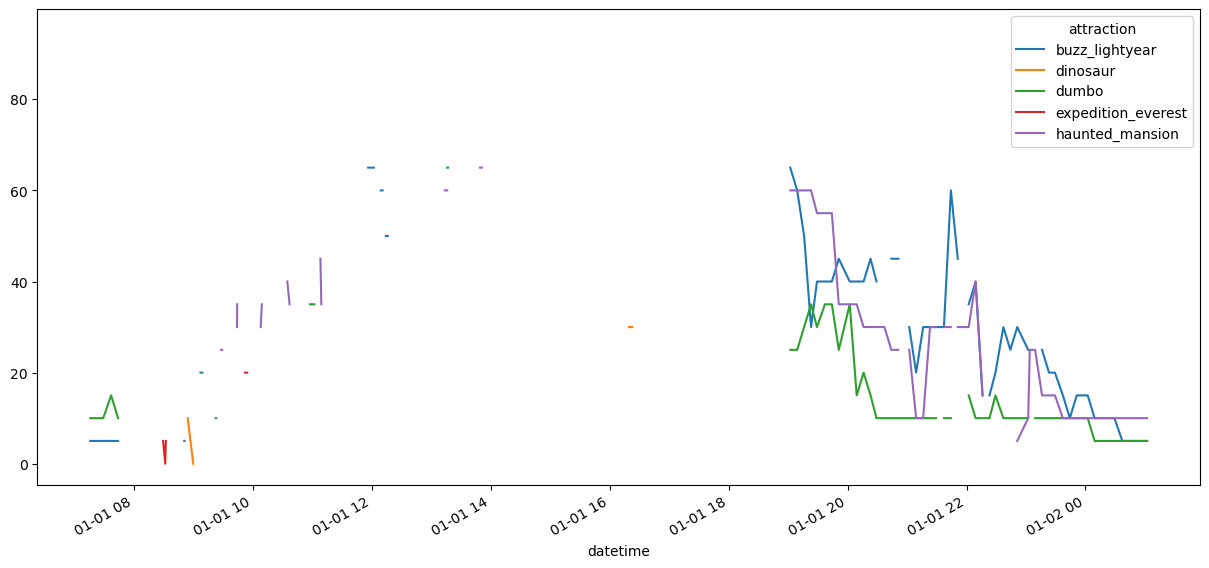

In [26]:
# pivot_temp.plot(figsize=(15,7))  # plot met NaN values, je mag geen pivot table gebruiken

In [ ]:
# Extract "minutes from df_wait" from the datetime columndf_wait_post['minute'] = df_wait_post['datetime'].dt.hour * 60 + df_wait_post['datetime'].dt.minute# Filter for specific attractionsselected_attractions = ['buzz_lightyear', 'dinosaur', 'dumbo', 'expedition_everest', 'haunted_mansion']df_selected = df_wait_post[df_wait_post['attraction'].isin(selected_attractions)]df_selected.head(10)avg_waits = (    df_selected    .groupby(['attraction', 'minute'])    .agg({'SPOSTMIN': 'mean'})    .reset_index())# Create the plotplt.figure(figsize=(15, 7))#Plot each attraction's waiting times# for attraction in selected_attractions:#     attraction_data = df_selected[df_selected['attraction'] == attraction]#     plt.plot(#         attraction_data['minute'], #         attraction_data['SPOSTMIN'], #         label=attraction#     )attraction_data = df_selected[df_selected['attraction'] == 'buzz_lightyear']plt.plot(    attraction_data['minute'],     attraction_data['SPOSTMIN'],     label=attraction)plt.title('Posted Waiting Times for Selected Attractions')plt.xlabel('Minute')plt.ylabel('Posted Waiting Time')plt.yticks(range(0, int(avg_waits['SPOSTMIN'].max()) + 20, 20))plt.xlim(400, avg_waits['minute'].max())plt.legend()plt.grid(True)plt.show()
 

NameError: name 'df_temp' is not defined

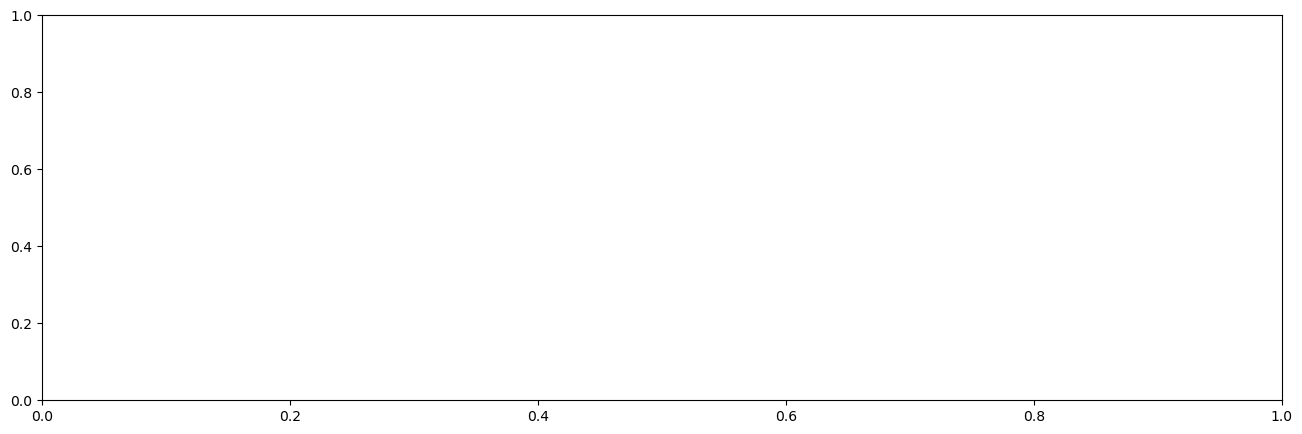

In [11]:
fig, ax = plt.subplots(figsize = (16,5))

for a in list_attraction:
    df_a = df_temp.query("attraction == @a and date == @date")
    # df_a['minutes'] = df_a['datetime'].dt.hour * 60 + df_a['datetime'].dt.minute
    # df_a = df_a.sort_values(by='minutes')
    # ax.plot(df_a['minutes'], df_a['SPOSTMIN'], label=a )
    ax.plot(df_a['datetime'], df_a['SPOSTMIN'], label=a )
plt.legend()

Step 3

In [15]:
df_grouped = df_waitingNA.groupby( ['attraction', 'date'] ).count()
df_grouped

datetime  SACTMIN  SPOSTMIN
attraction      date                                   
7_dwarfs_train  2015-01-01       132        0       132
                2015-01-02       143        0       143
                2015-01-03       135        0       135
                2015-01-04       115        0       115
                2015-01-05       115        0       115
...                              ...      ...       ...
winnie_the_pooh 2021-12-24       151        0       151
                2021-12-25       145        0       145
                2021-12-26       127        0       127
                2021-12-27       158        0       158
                2021-12-28       134        0       134

[74858 rows x 3 columns]

In [16]:
df_step3 = df_grouped['SPOSTMIN'].groupby('attraction').mean().sort_values()
df_step3

attraction
liberty_sq_riverboat                44.882353
pirate_s_adventure                  45.750000
tom_sawyer_island                   47.946809
enchanted_tiki_rm                   66.035156
hall_of_presidents                  68.200000
country_bears                       70.801325
sorcerers_of_the_mk                 75.285714
it_s_a_small_world                  97.635770
swiss_family_tree                  101.225513
kilimanjaro_safaris                101.861743
dinosaur                           103.262873
laugh_floor                        105.388235
expedition_everest                 105.945400
carousel_of_progress               106.792899
rock_n_rollercoaster               111.029042
spaceship_earth                    111.666237
slinky_dog                         113.172676
princess_hall__cinderella_elena    113.481928
toy_story_mania                    113.935289
princess_hall__rapunzel_tiana      114.205195
peoplemover                        115.306092
alien_saucers          

Text(0.5, 0, 'Observation Count')

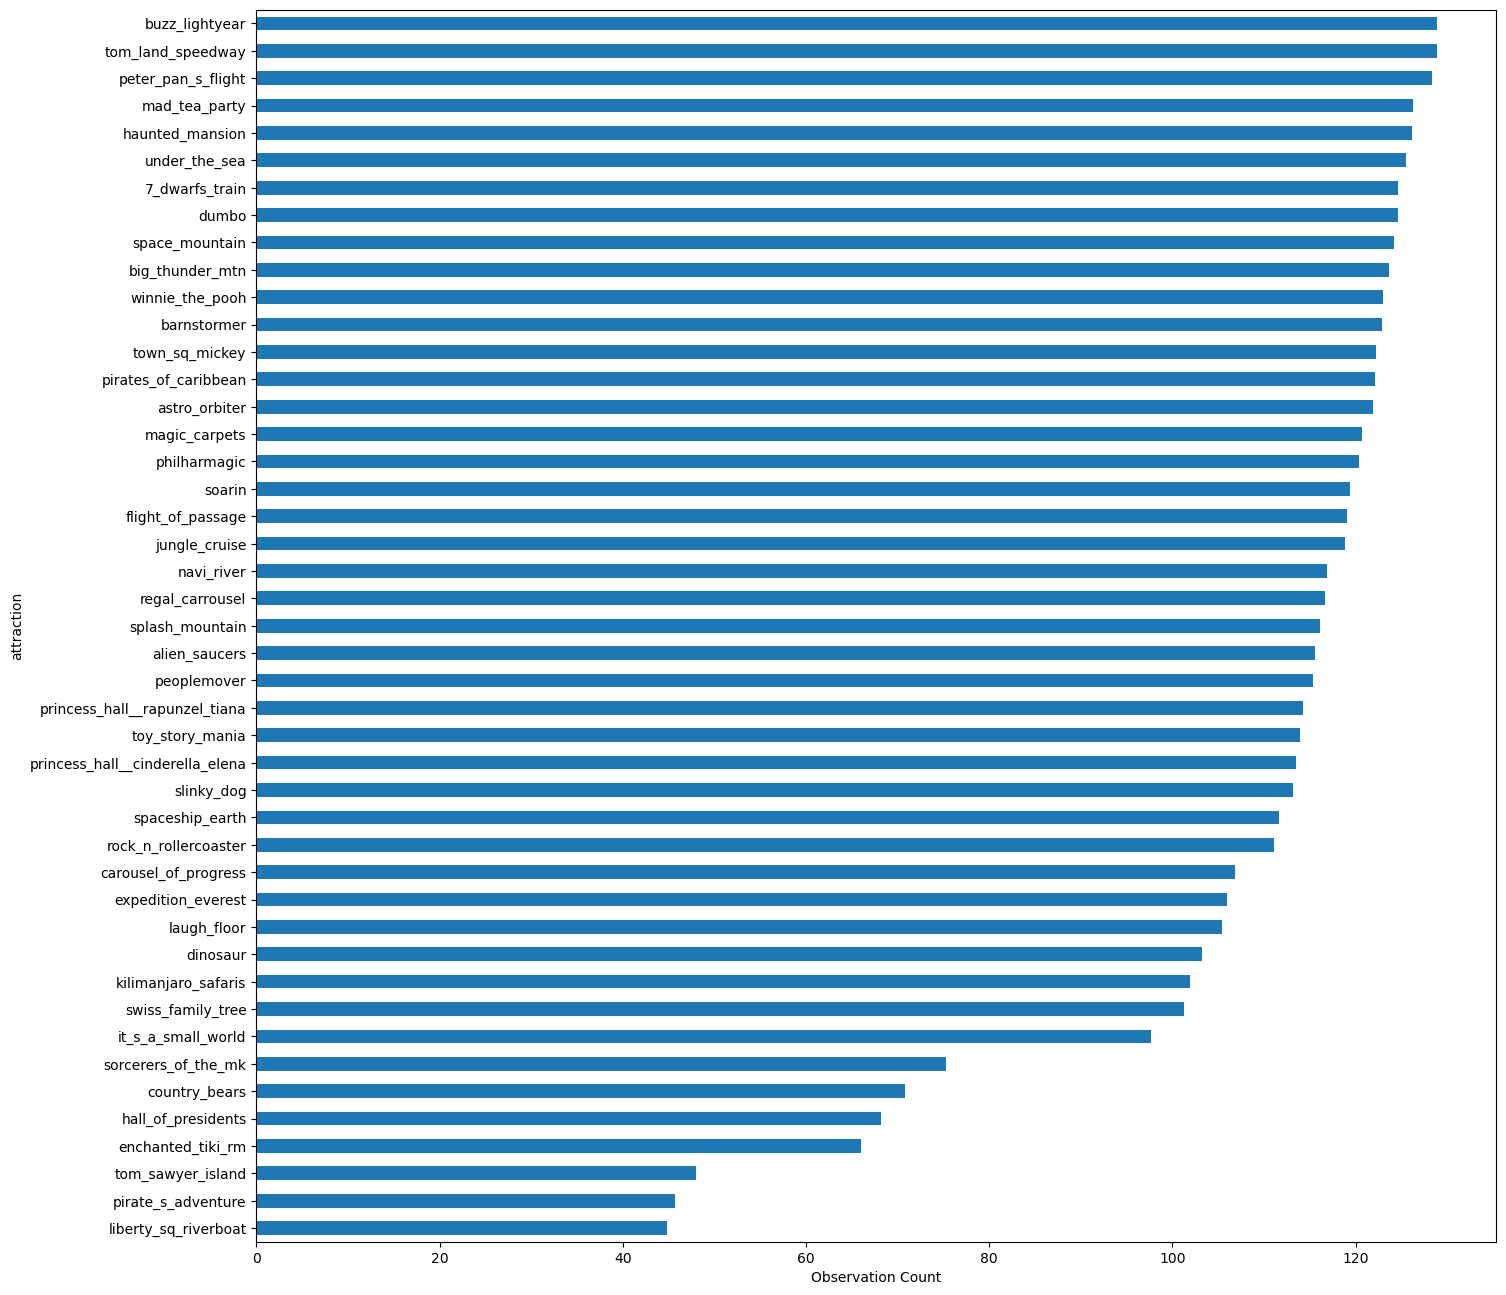

In [17]:
fig, ax = plt.subplots(figsize=(16,16))
# plt.xlabel('observation count')  # werkt niet want moet NA plot staan !!
df_step3.plot(kind='barh')
ax.set_xlabel('Observation Count')

Step 4 : Bestudeer de spreiding van de beschikbaarheid van gegevens voor actuele wachttijdinformatie.¶
Er lijkt niet zo veel informatie beschikbaar te zijn over de werkelijke wachttijden bij attracties. Is dit omdat we elke dag gewoon beperkte gegevens hebben, of zijn er enkele dagen met veel informatie? Maak een aantal visualisaties maken om dit te onderzoeken?

In [8]:
df_actual = df_overall.copy()


In [9]:
df_actualNA = df_actual[ ~df_actual.SACTMIN.isnull() ]
df_actualNA  # 192389 rijen , versus 192372 rows df_act_wait Peter

,date,datetime,SACTMIN,SPOSTMIN,attraction
2,01/01/2015,2015-01-01 08:05:30,54.0,NaN,7_dwarfs_train
5,01/01/2015,2015-01-01 08:22:16,55.0,NaN,7_dwarfs_train
177,01/02/2015,2015-01-02 12:20:00,160.0,NaN,7_dwarfs_train
264,01/02/2015,2015-01-02 21:49:47,65.0,NaN,7_dwarfs_train
281,01/02/2015,2015-01-03 00:44:09,19.0,NaN,7_dwarfs_train
...,...,...,...,...,...
10305771,12/26/2021,2021-12-26 17:28:07,51.0,NaN,winnie_the_pooh
10305824,12/26/2021,2021-12-26 22:46:18,1.0,NaN,winnie_the_pooh
10305950,12/27/2021,2021-12-27 19:24:28,14.0,NaN,winnie_the_pooh
10305996,12/28/2021,2021-12-28 08:50:05,16.0,NaN,winnie_the_pooh


In [11]:
df_actualNA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192389 entries, 2 to 10306045
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        192389 non-null  object 
 1   datetime    192389 non-null  object 
 2   SACTMIN     192389 non-null  float64
 3   SPOSTMIN    0 non-null       float64
 4   attraction  192389 non-null  object 
dtypes: float64(2), object(3)
memory usage: 8.8+ MB


<Axes: >

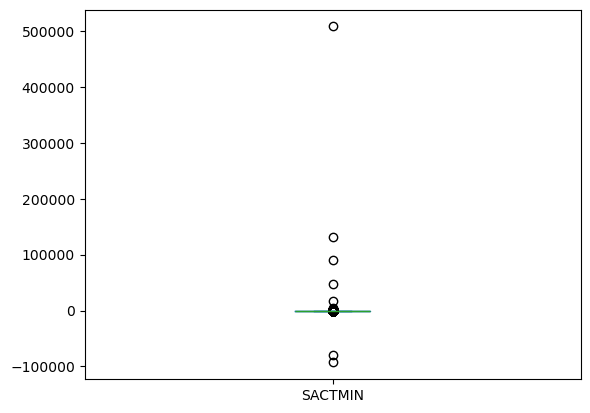

In [13]:
df_actualNA['SACTMIN'].plot(kind='box')

In [36]:
df_outl2 = df_actualNA[ ( df_actualNA['SACTMIN']>10000) | (df_actualNA['SACTMIN']<0 ) ]
df_outl2  # origineel 192389 rows

,date,datetime,SACTMIN,SPOSTMIN,attraction
105109,02/20/2017,2017-02-20 09:04:37,-92918.0,NaN,7_dwarfs_train
2871458,11/08/2017,2017-10-06 09:34:33,47897.0,NaN,flight_of_passage
2944969,05/27/2019,2019-05-15 19:12:13,17134.0,NaN,flight_of_passage
3766900,12/30/2016,2016-12-30 20:55:54,-79187.0,NaN,jungle_cruise
5387992,06/02/2019,2019-03-02 17:20:51,131935.0,NaN,peoplemover
5922540,03/25/2018,2017-04-06 10:30:33,508261.0,NaN,philharmagic
9531614,02/03/2018,2017-12-02 16:28:57,90387.0,NaN,toy_story_mania


In [35]:
df_actual_cleaned = df_actualNA[ ( df_actualNA['SACTMIN']<=10000) & (df_actualNA['SACTMIN']>=0 ) ]
df_actual_cleaned

,date,datetime,SACTMIN,SPOSTMIN,attraction
2,01/01/2015,2015-01-01 08:05:30,54.0,NaN,7_dwarfs_train
5,01/01/2015,2015-01-01 08:22:16,55.0,NaN,7_dwarfs_train
177,01/02/2015,2015-01-02 12:20:00,160.0,NaN,7_dwarfs_train
264,01/02/2015,2015-01-02 21:49:47,65.0,NaN,7_dwarfs_train
281,01/02/2015,2015-01-03 00:44:09,19.0,NaN,7_dwarfs_train
...,...,...,...,...,...
10305771,12/26/2021,2021-12-26 17:28:07,51.0,NaN,winnie_the_pooh
10305824,12/26/2021,2021-12-26 22:46:18,1.0,NaN,winnie_the_pooh
10305950,12/27/2021,2021-12-27 19:24:28,14.0,NaN,winnie_the_pooh
10305996,12/28/2021,2021-12-28 08:50:05,16.0,NaN,winnie_the_pooh


<Axes: >

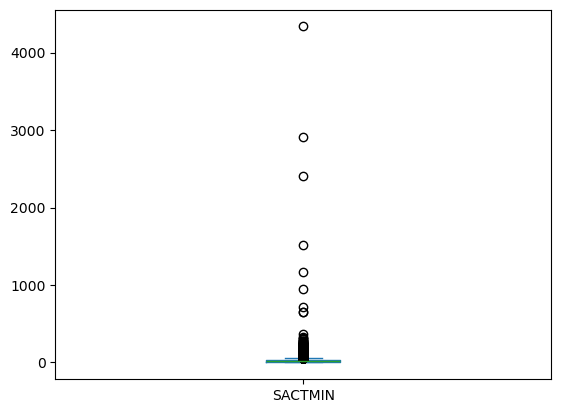

In [37]:
df_actual_cleaned['SACTMIN'].plot(kind='box')

In [38]:
df_outl3 = df_actual_cleaned[  df_actualNA['SACTMIN']>500 ]
df_outl3 

/tmp/ipykernel_39210/1068753238.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_outl3 = df_actual_cleaned[  df_actualNA['SACTMIN']>500 ]


,date,datetime,SACTMIN,SPOSTMIN,attraction
1183396,12/05/2017,2017-12-04 22:22:37,952.0,NaN,big_thunder_mtn
2884048,02/23/2018,2018-02-20 15:46:37,4338.0,NaN,flight_of_passage
2914426,10/07/2018,2018-10-05 09:41:12,2911.0,NaN,flight_of_passage
2928120,01/23/2019,2019-01-22 21:03:36,1171.0,NaN,flight_of_passage
3306132,10/20/2018,2018-10-19 12:37:49,1511.0,NaN,haunted_mansion
4272493,10/10/2015,2015-10-10 19:18:21,2413.0,NaN,laugh_floor
5357684,11/06/2016,2016-11-06 11:39:44,656.0,NaN,peoplemover
6914954,04/10/2019,2019-04-10 11:02:28,718.0,NaN,regal_carrousel
9597341,06/25/2019,2019-06-25 09:04:38,658.0,NaN,toy_story_mania


In [1]:
df_actual_cleaned2 = df_actualNA[ ( df_actualNA['SACTMIN']<=500) & (df_actualNA['SACTMIN']>=0 ) ]
df_actual_cleaned2

NameError: name 'df_actualNA' is not defined

Research Question 1: Compare predicted and actual waiting time

Create a visualization that shows how the predicted and actual waiting times compare, one option would be
to execute the following steps:
- For each actual waiting time, find the previous and next posted waiting time.
- Use linear interpolation to find the best estimate of posted waiting time for the actual waiting time we
are investigating.
- Compute the difference between the actual and posted waiting time.
- Create a histogram of all these differences, you can also use a scatterplot and a heatmap/2D histogram.
You can then look at some specific dates and attractions for which you have a lot of actual waiting time
information for and then plot the actual and posted waiting time together ina single plot.


Research Question 2: best day for rides

Filter out the attractions which have category_code == ride and find out which day of the week
(Monday/Tuesday/...) these rides have the smallest posted waiting times on average. In a second step, try to
further look specifically into the combination of day of the week and HOLIDAYM value. Ideally, you should also
explain what this means